**Eksplorasi Data Analysis Anggaran DKI Jakarta Untuk Mengidentifikasi Tren Pengeluaran dan Prioritas Kegiatan**

**Kelompok 10**

1.   Muhammad Igin Adigholib (2301125)
2.   Rahmat Taufik Al-Hidayah (2300414)
3.   Anugrah Bayu Satrio (2300624)
4.   Muhamad Khafabillah Sopian (2307824)
5.   Rexy Putra Nur Laksana (2309578)






# **Pendahuluan**

Eksplorasi Data Analysis (EDA) merupakan langkah awal yang penting dalam memahami karakteristik suatu dataset. Dalam konteks ini, analisis anggaran DKI Jakarta bertujuan untuk mengidentifikasi tren pengeluaran serta prioritas alokasi dana untuk berbagai kegiatan. Dengan memanfaatkan metode EDA, kita dapat menggali pola-pola tersembunyi, mengidentifikasi anomali, serta mendapatkan wawasan mengenai distribusi anggaran di berbagai sektor. Analisis ini diharapkan dapat memberikan gambaran mendalam terkait penggunaan anggaran dan bagaimana pemerintah daerah mengarahkan sumber daya untuk pembangunan dan pelayanan publik.

# **Pertanyaan**

1. Berapa total anggaran provinsi DKI Jakarta pada setiap tahun nya?
2. Apa nama kegiatan yang menerima alokasi anggaran terbesar pada setiap tahunnya?
3. Pada tahun berapa terjadi lonjakan terbesar anggaran provinsi DKI Jakarta?

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join
from IPython.core.display import display, HTML


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dir = "/content/drive/MyDrive/Data Mining(EDA)/"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
belanja = pd.read_csv(join(dir, "Filedata Data Anggaran Belanja DKI Jakarta Per Kegiatan.csv"))
belanja2014 = pd.read_csv(join(dir, "Filedata Data Anggaran Belanja DKI Jakarta Per Kegiatan.csv"))
apbd = pd.read_csv(join(dir, "Data APBD Provinsi DKI Jakarta.csv"))
apbd2015 = pd.read_csv(join(dir, "Data APBD Penetapan 2015 DKI Jakarta (1).csv"))
apbd2016 = pd.read_csv(join(dir, " Data APBD Provinsi DKI Jakarta Tahun 2016.csv"))
apbd2017 = pd.read_csv(join(dir, "Data APBD Provinsi DKI Jakarta Tahun 2017.csv"))
apbd2018 = pd.read_csv(join(dir, "Data Perencanaan APBD 2018.csv"))
apbd2019 = pd.read_csv(join(dir, "Data APBD Provinsi DKI Jakarta Tahun 2019.csv"))
apbd2020 = pd.read_csv(join(dir, "Data APBD Provinsi DKI Jakarta Tahun 2020 (1).csv"))
pelaksanaan = pd.read_csv(join(dir, "Data Capaian Pelaksanaan Kegiatan APBD 2017 (2).csv"))

<ipython-input-26-f779bb60db30>:8: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  apbd2019 = pd.read_csv(join(dir, "Data APBD Provinsi DKI Jakarta Tahun 2019.csv"))
<ipython-input-26-f779bb60db30>:9: DtypeWarning: Columns (6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  apbd2020 = pd.read_csv(join(dir, "Data APBD Provinsi DKI Jakarta Tahun 2020 (1).csv"))


In [ ]:
belanja.rename(columns={'kegiatan': 'nama_kegiatan'}, inplace=True)
belanja2014.rename(columns={'kegiatan': 'nama_kegiatan'}, inplace=True)
apbd2015.rename(columns={'kegiatan': 'nama_kegiatan'}, inplace=True)
apbd2015.rename(columns={'anggaran': 'nilai_anggaran'}, inplace=True)
apbd2018.rename(columns={'anggaran': 'nilai_anggaran'}, inplace=True)
pelaksanaan.rename(columns={'anggaran': 'nilai_anggaran'}, inplace=True)
pelaksanaan.rename(columns={'kegiatan': 'nama_kegiatan'}, inplace=True)

data_belanja = belanja[['nama_kegiatan', 'nilai_anggaran', 'periode_data']]
data_belanja2014 = belanja2014[['nama_kegiatan', 'nilai_anggaran', 'periode_data']]
data_apbd2015 = apbd2015[['nama_kegiatan', 'nilai_anggaran', 'periode_data']]
data_apbd2016 = apbd2016[['nama_kegiatan', 'nilai_anggaran', 'periode_data']]
data_apbd2017 = apbd2017[['nama_kegiatan', 'nilai_anggaran', 'periode_data']]
data_apbd2018 = apbd2018[['nama_kegiatan', 'nilai_anggaran', 'periode_data']]
data_apbd2019 = apbd2019[['nama_kegiatan', 'nilai_anggaran', 'periode_data']]
data_apbd2020 = apbd2020[['nama_kegiatan', 'nilai_anggaran', 'periode_data']]
data_apbd = apbd[['nama_kegiatan', 'nilai_anggaran', 'periode_data']]
data_pelaksanaan = pelaksanaan[['nama_kegiatan', 'nilai_anggaran', 'periode_data']]

In [ ]:
# Menggabungkan semua DataFrame
data_combined = pd.concat([
    data_belanja,
    data_belanja2014,
    data_apbd2015,
    data_apbd2016,
    data_apbd2017,
    data_apbd2018,
    data_apbd2019,
    data_apbd2020,
    data_apbd,
    data_pelaksanaan
], ignore_index=True)

In [ ]:
data_combined.isna().sum()

,0
nama_kegiatan,0
nilai_anggaran,97
periode_data,0


In [ ]:
# Menghapus tanda koma pada kolom nilai_anggaran dan mengonversinya menjadi tipe data numerik
data_combined['nilai_anggaran'] = data_combined['nilai_anggaran'].replace({',': ''}, regex=True).astype(float)

# Mengelompokkan data berdasarkan periode_data dan menjumlahkan nilai_anggaran
total_anggaran_per_tahun = data_combined.groupby('periode_data')['nilai_anggaran'].sum().reset_index()

# Menampilkan hasil total nilai anggaran per tahun
print(total_anggaran_per_tahun)

   periode_data  nilai_anggaran
0          2013    7.704184e+13
1          2015    4.383513e+13
2          2016    1.329194e+14
3          2017    5.743323e+14
4          2018    2.795939e+13
5          2019    1.767341e+14
6          2020    9.935461e+13
7          2023    7.214488e+13


Data ini mencakup kegiatan dan nilai anggaran DKI Jakarta dari 2013 hingga 2023, termasuk dana jaminan kesehatan dan pembebasan lahan, dengan beberapa tahun tanpa nama kegiatan, tetapi tetap memiliki anggaran

In [ ]:
# Mengelompokkan data untuk mendapatkan alokasi anggaran terbesar per tahun
top_kegiatan_per_tahun = data_combined.loc[data_combined.groupby(['periode_data'])['nilai_anggaran'].idxmax()]


In [ ]:
# Mengambil kegiatan dengan nilai anggaran tertinggi untuk setiap periode_data
largest_allocation = data_combined.loc[data_combined.groupby('periode_data')['nilai_anggaran'].idxmax()]

# Menampilkan hasil
display(largest_allocation[['periode_data', 'nama_kegiatan', 'nilai_anggaran']])


,periode_data,nama_kegiatan,nilai_anggaran
85109,2013,Penyediaan Dana jaminan pemeliharaan kesehatan daerah,1.500000e+12
174051,2015,Pembebasan Lahan untuk Ruang Terbuka Hijau di Provinsi DKI Jakarta,2.234831e+12
259086,2016,Non Kegiatan,1.300000e+13
260050,2017,Non Kegiatan,1.351480e+13
312248,2018,Pembiayaan Premi Peserta Penerima Bantuan Iuran (PBI) Daerah,1.242000e+12
401636,2019,-,1.677800e+13
462431,2020,-,5.180000e+12
462586,2023,Administrasi Keuangan Perangkat Daerah,7.336830e+12


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

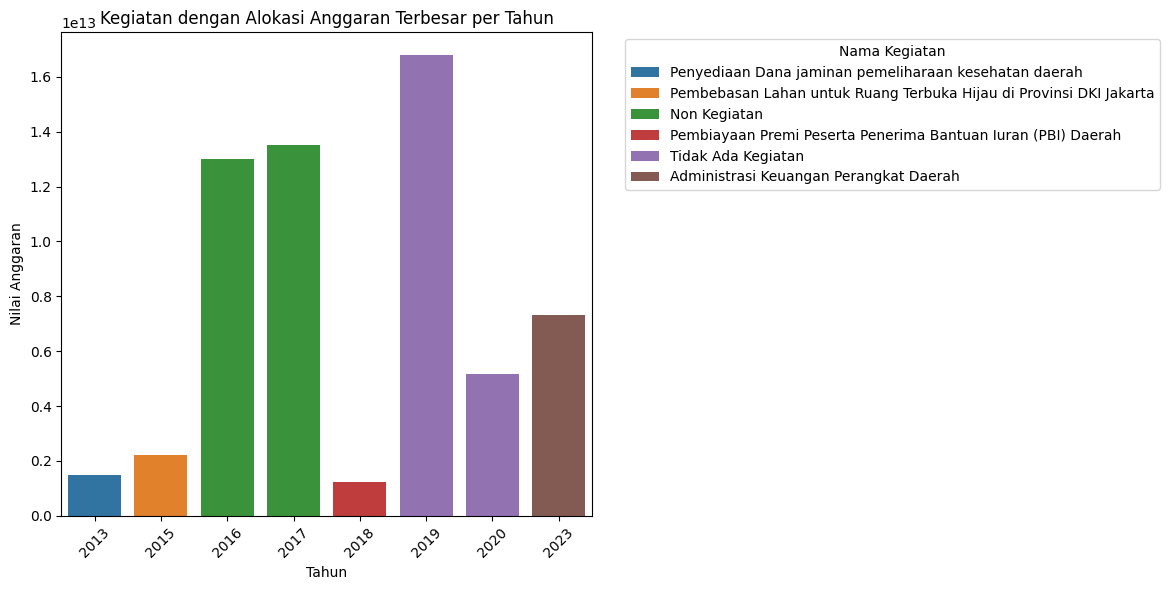

In [ ]:
# Mengganti nama_kegiatan yang berisi "-" menjadi "Tidak Ada Kegiatan" pada tahun 2019 dan 2020
data_combined.loc[
    (data_combined['periode_data'].isin([2019, 2020])) & (data_combined['nama_kegiatan'] == '-'),
    'nama_kegiatan'
] = 'Tidak Ada Kegiatan'

# Mengambil kegiatan dengan nilai anggaran tertinggi untuk setiap tahun
top_kegiatan_per_tahun = data_combined.loc[data_combined.groupby('periode_data')['nilai_anggaran'].idxmax()]

# Membuat grafik batang
plt.figure(figsize=(12, 6))
sns.barplot(data=top_kegiatan_per_tahun, x='periode_data', y='nilai_anggaran', hue='nama_kegiatan')
plt.title('Kegiatan dengan Alokasi Anggaran Terbesar per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Nilai Anggaran')
plt.xticks(rotation=45)
plt.legend(title='Nama Kegiatan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# **Kesimpulan**

Pada grafik di atas dapat disimpulkan bahwa terdapat jumlah anggaran di setiap tahun, untuk kegiatan yang menerima alokasi anggaran terbesar yaitu sebagai berikut.
*   Penyediaan Dana jaminan pemeliharaan kesehatan daerah (2013)
*   Pembebasan Lahan untuk Ruang Terbuka Hijau di Provinsi DKI Jakarta (2015)
*   Non Kegiatan (2016)
*   Non Kegiatan (2017)
*   Pembiayaan Premi Peserta Penerima Bantuan Iuran (PBI) Daerah (2018)
*   Tidak ada kegiatan (2019)
*   Tidak ada kegiatan (2020)
*   Administrasi Keuangan Perangkat Daerah (2023)

Dan pada tahun 2019 terjadi lonjakan anggaran terbesar.








